# Challenge 1: The banknote-authentication data set problem

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive-beta.ics.uci.edu/dataset/267/banknote+authentication

## COSE DA FARE

- sistemare il codice  e la struttura delle cose 
- mettere insieme le immagini
- riflettere insieme sulle considerazioni
- controllare che non ci siano sbagli concettuali
- fare trasformazione logaritmica
- capire cosa intende con "se aggiungo tutte le coordinate"

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

### 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [36]:
# Load the data
colNames=['variance','skewness','curtosis','entropy','counterfit']
df = pd.read_csv('./data_banknote_authentication.txt', header=None, names=colNames)
df

,variance,skewness,curtosis,entropy,counterfit
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [37]:
# controllo se ci sono valori mancanti
df.isna().sum()

variance      0
skewness      0
curtosis      0
entropy       0
counterfit    0
dtype: int64

I dati sono ordinati rispetto alla variabile risposta 'counterfit'. questo potrebbe creare problemi nella costruzione del modello di machine learning, soprattutto se si utilizzano algoritmi di apprendimento supervisionato.Infatti, se i dati sono ordinati in base alla variabile di risposta, il modello potrebbe avere difficoltà a generalizzare su nuovi dati che non rispettano lo stesso ordine. Inoltre, potrebbe non essere in grado di distinguere correttamente le diverse categorie di counterfit e quindi la sua capacità predittiva sarebbe limitata.

In generale, è sempre meglio avere un dataset ben bilanciato e casuale, in modo che il modello possa imparare la relazione tra le variabili indipendenti e la variabile di risposta in modo più accurato e generalizzabile.

In [38]:
# Shuffle dei dati del dataframe
df_shuffled = df.sample(frac=1,random_state=123).reset_index(drop=True)
df_shuffled

,variance,skewness,curtosis,entropy,counterfit
0,-0.27800,8.18810,-3.13380,-2.527600,0
1,1.44790,-4.87940,8.34280,-2.108600,0
2,3.92620,6.02990,-2.01560,-0.065531,0
3,2.41960,6.46650,-0.75688,0.228000,0
4,-3.57980,0.45937,2.34570,-0.457340,1
...,...,...,...,...,...
1367,-1.69880,-7.11630,5.79020,0.167230,1
1368,2.31360,10.66510,-3.52880,-4.767200,0
1369,0.27331,4.87730,-4.91940,-5.819800,1
1370,-2.02850,3.84680,-0.63435,-1.175000,1


In [39]:
y = df_shuffled["counterfit"].copy()
X = df_shuffled.drop(columns=["counterfit"])
X.shape

(1372, 4)

(-1.110655790002362,
 1.1274278388532937,
 -1.110331247556645,
 1.1215951788743914)

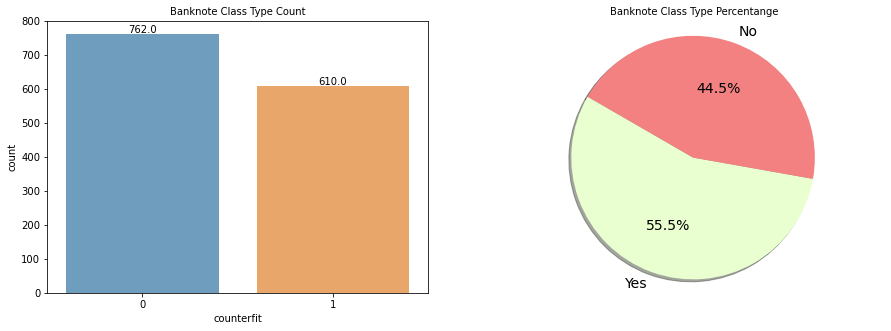

In [40]:
import seaborn as sb
#The number of mushrooms classwise - e=Edible, p=Poisonous
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Banknote Class Type Count', fontsize=10)
s = sb.countplot(x = "counterfit", data = df, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')


ax = plt.subplot(122)
classpie = df['counterfit'].value_counts()
size = classpie.values.tolist()
types = classpie.axes[0].tolist()
labels = 'Yes', 'No'
colors = ['#EAFFD0', '#F38181']
plt.title('Banknote Class Type Percentange', fontsize=10)
patches, texts, autotexts = plt.pie(size, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')

il 55% circa delle banconote sono contraffate

<AxesSubplot:>

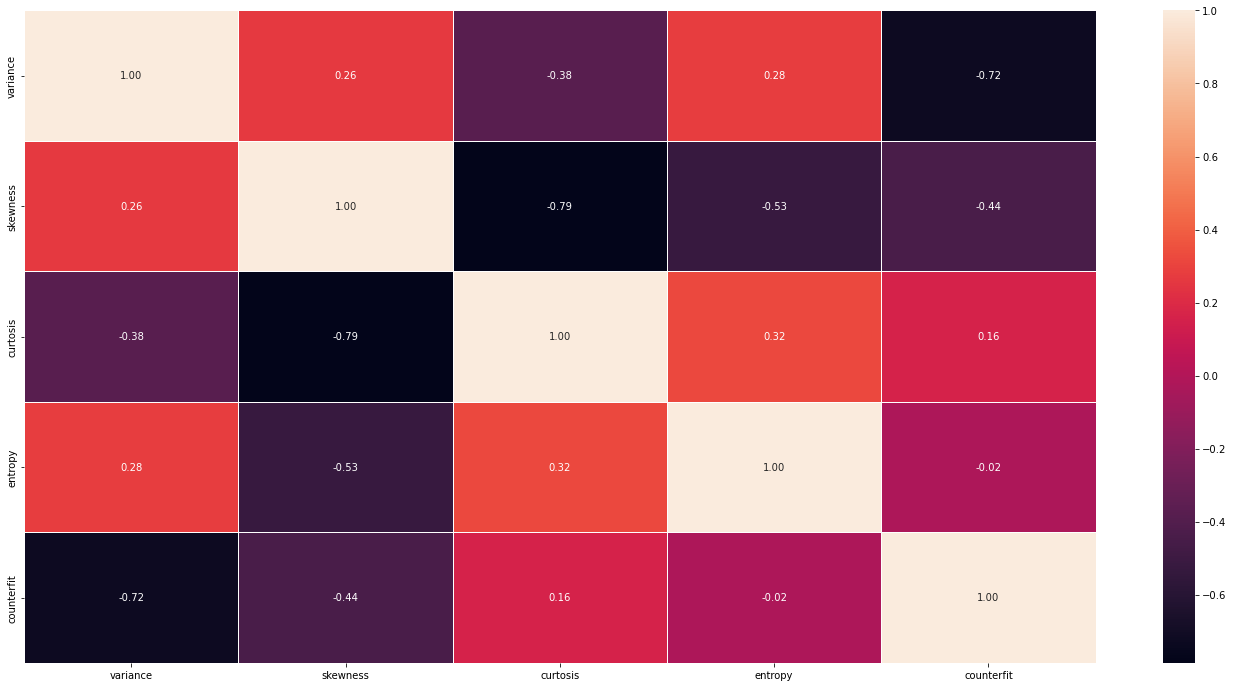

In [41]:
import seaborn as sns
# Explore correlations visually
f, ax = plt.subplots(figsize=(24,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)

In [42]:
from sklearn import preprocessing
# Rescale the features of the data since the units are different: substract the average and divide by the standard deviation
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['variance','skewness','curtosis','entropy'])
X_scaled

,variance,skewness,curtosis,entropy
0,-0.250459,1.067981,-1.051751,-0.636089
1,0.356883,-1.159342,1.611985,-0.436588
2,1.228994,0.700121,-0.792215,0.536187
3,0.698823,0.774539,-0.500064,0.675947
4,-1.412358,-0.249362,0.220049,0.349633
...,...,...,...,...
1367,-0.750437,-1.540616,1.019523,0.647013
1368,0.661522,1.490180,-1.143431,-1.702439
1369,-0.056453,0.503663,-1.466192,-2.203618
1370,-0.866458,0.328017,-0.471625,0.007931


### Analisi esplorativa dei dati

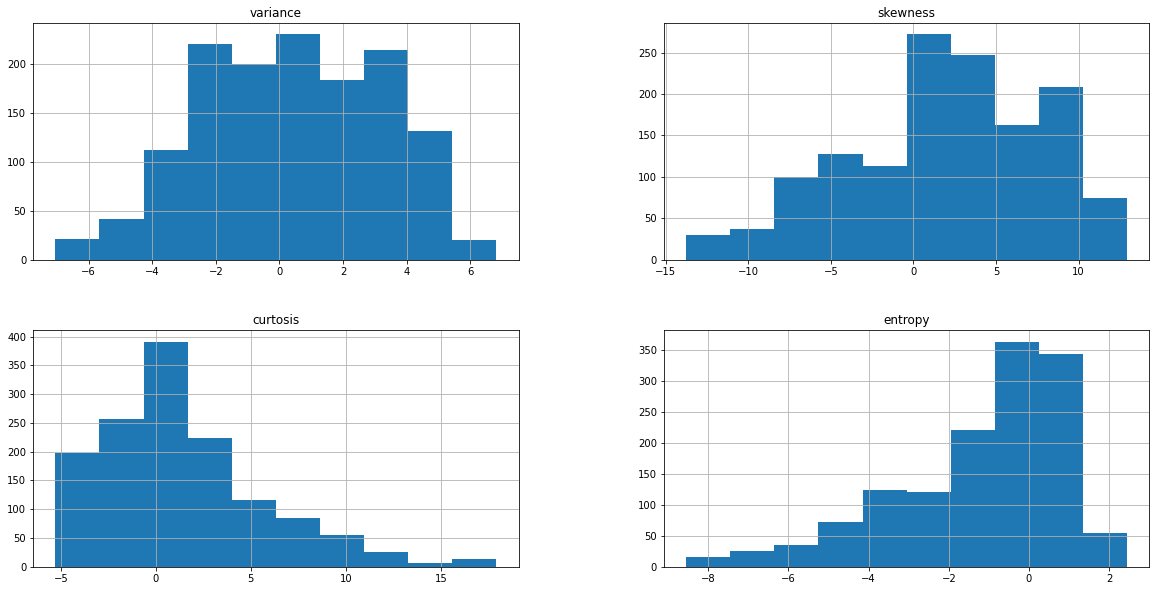

In [43]:
# Check for distribution of data
ax = X.hist(figsize=(20,10))
plt.show()

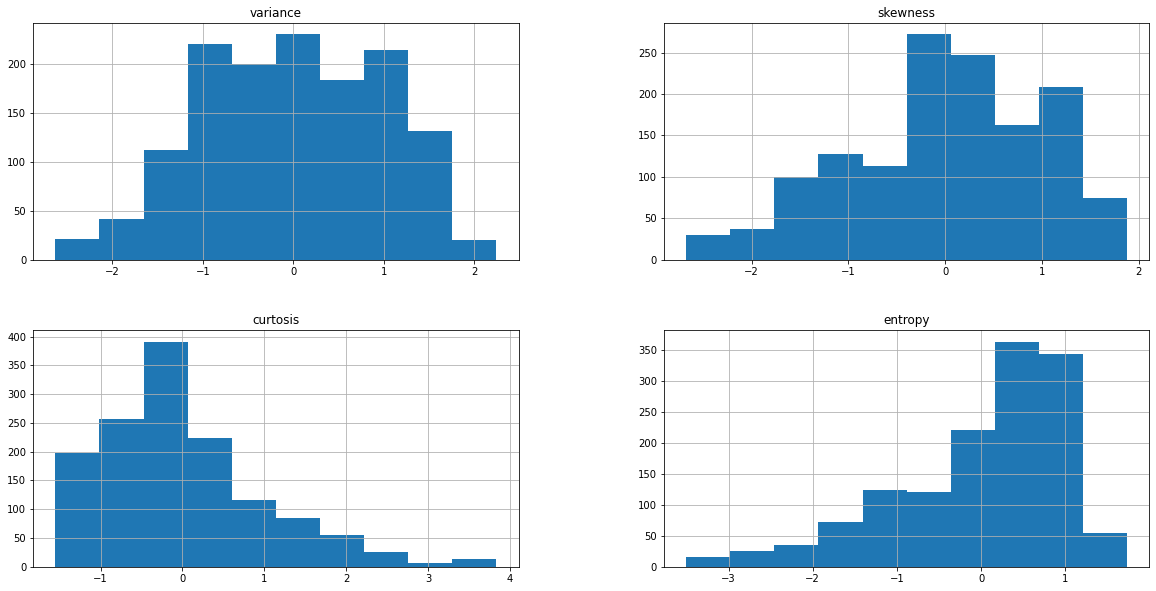

In [44]:
# Check for distribution of data
ax = X_scaled.hist(figsize=(20,10))
plt.show()

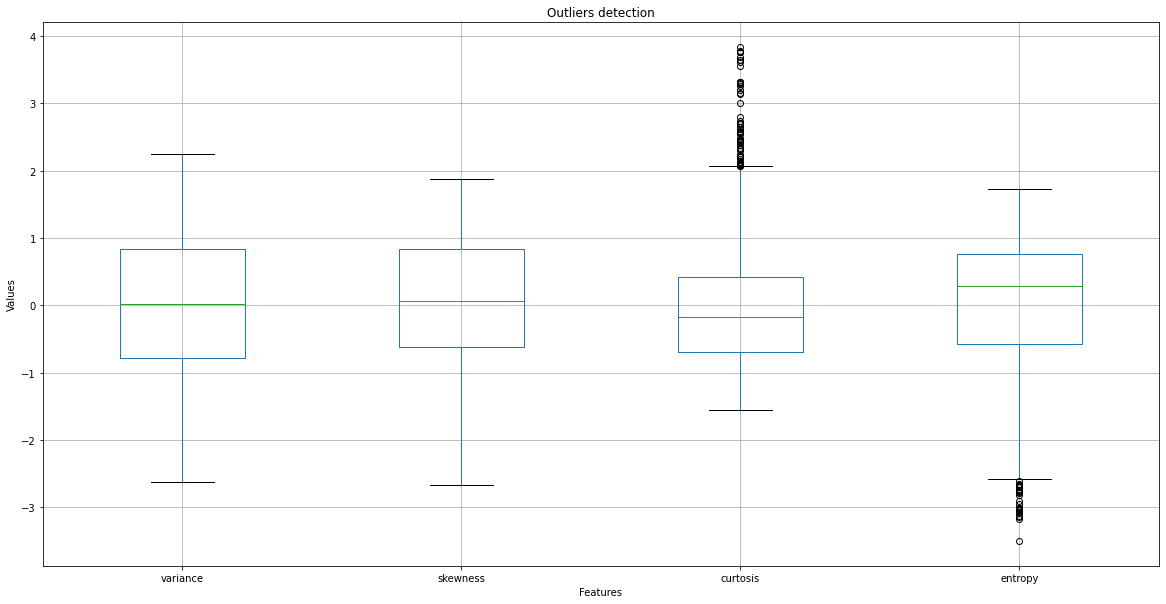

In [45]:
# Check for outliers
ax = X_scaled.boxplot(figsize=(20,10))
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Outliers detection')
plt.show()

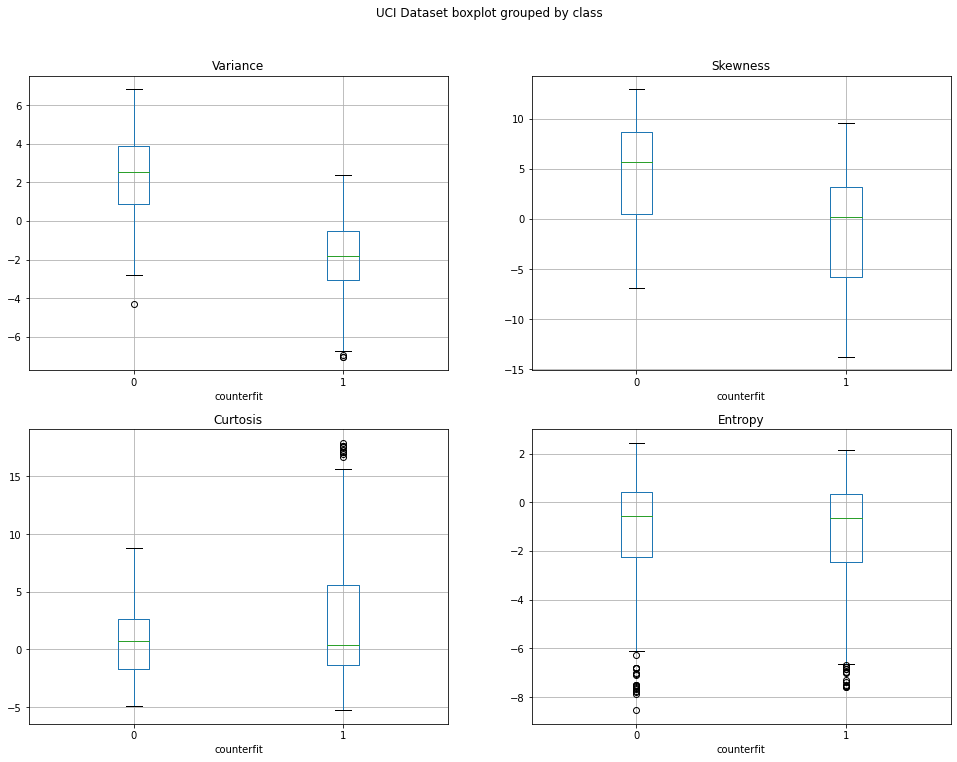

In [46]:
fig = plt.figure(figsize = (16,12))
ax = plt.subplot(221)
df_shuffled.boxplot(by = 'counterfit', column = "variance", ax = ax)
plt.title("Variance")
ax = plt.subplot(222)
df_shuffled.boxplot(by = 'counterfit', column = "skewness", ax = ax)
plt.title("Skewness")
ax = plt.subplot(223)
df_shuffled.boxplot(by ='counterfit', column = "curtosis", ax = ax)
plt.title("Curtosis")
ax = plt.subplot(224)
df_shuffled.boxplot(by = 'counterfit', column = "entropy", ax = ax)
plt.title("Entropy")
plt.suptitle("UCI Dataset boxplot grouped by class")
plt.show()
plt.close()

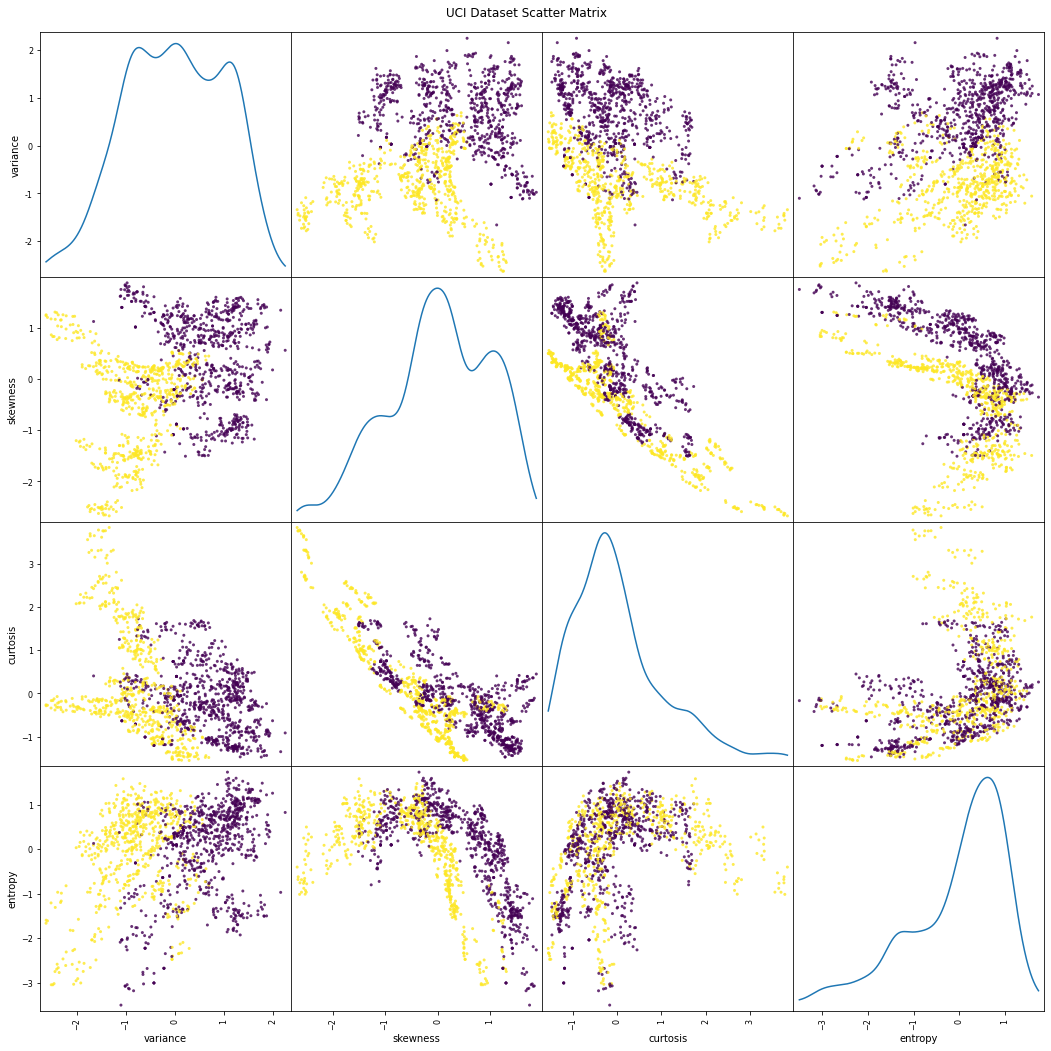

In [47]:
pd.plotting.scatter_matrix(X_scaled, c = y, figsize = (18,18), diagonal = "kde", alpha = .8)
plt.suptitle("UCI Dataset Scatter Matrix", y = .9)
plt.show()
plt.close()

### 2. Unsupervised Learning

Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

#### PCA

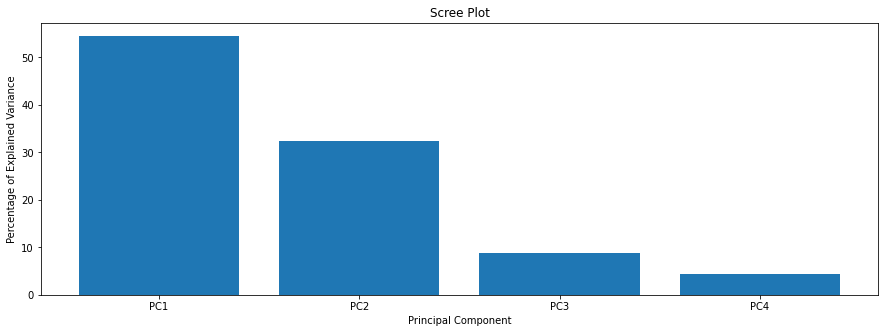

In [48]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

perc_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(perc_var)+1)]

plt.bar(x=range(1, len(perc_var)+1), height=perc_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


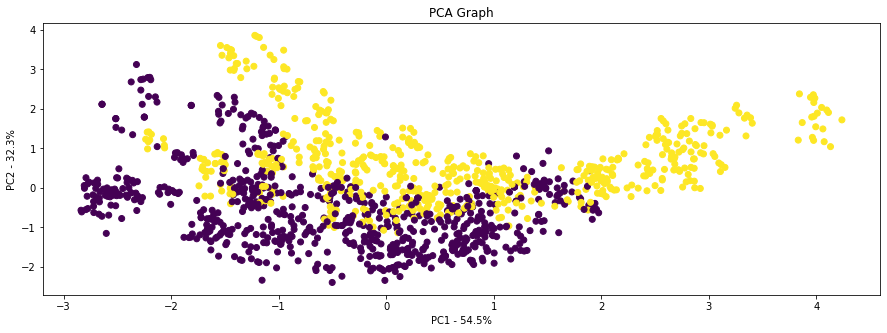

In [49]:
pca_df = pd.DataFrame(X_pca, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2, c=y)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(perc_var[0]))
plt.ylabel('PC2 - {0}%'.format(perc_var[1]))
plt.show()

#### K-means

What happens when I applied k-means with two classes in this space? And if I use all the coordinates?

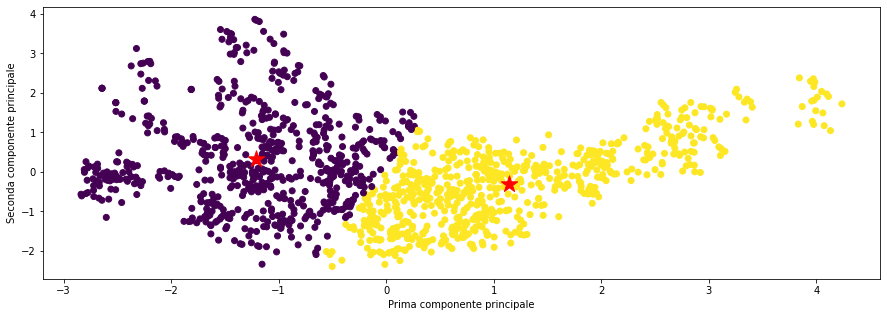

In [51]:
from sklearn.cluster import KMeans

# Istanzia l'oggetto KMeans con 2 cluster
kmeans = KMeans(n_clusters=2)

# Applica KMeans alle prime 2 componenti principali
kmeans.fit(X_pca)

# Ottieni le etichette di cluster e i centroidi
kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Crea un grafico dei cluster colorati rispetto alla variabile y
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('Prima componente principale')
plt.ylabel('Seconda componente principale')
plt.show()


In [52]:
from sklearn.metrics.cluster import normalized_mutual_info_score
# Compute the normalized mutual information between the predicted and the ground truth classification
normalized_mutual_info_score(kmeans_labels, np.array(y).flatten())

0.010642014990965471

#### t-SNE

Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

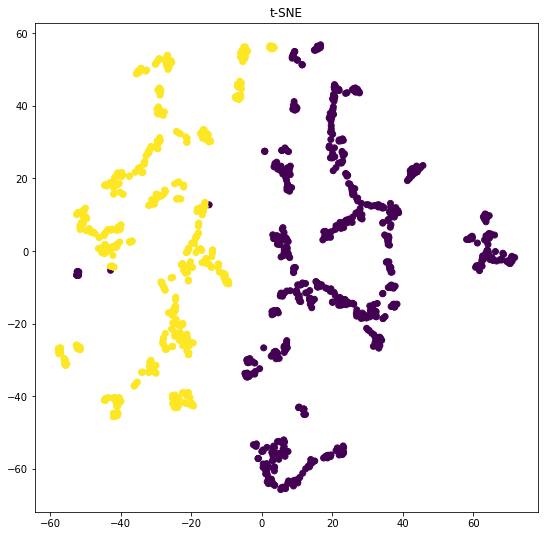

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=15).fit_transform(X_scaled)
fig, ax =plt.subplots(figsize=(9,9))
ax.scatter(X_embedded[:,0],X_embedded[:,1], c=y)
ax.set_title('t-SNE')
plt.show()


T-Sne sembra risucire a creare due cluster distinti

#### DBSCAN

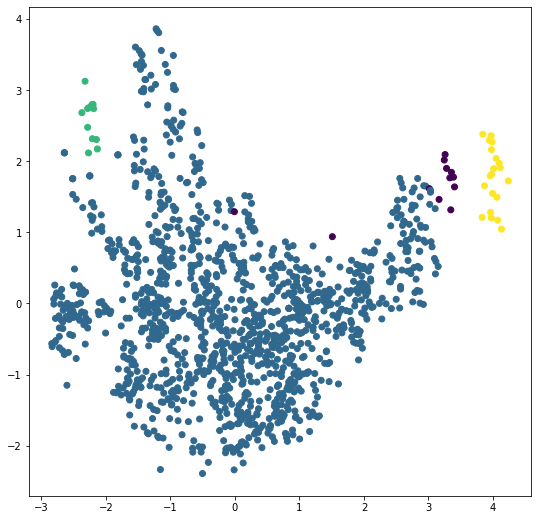

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=12).fit(X_pca)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
ax.scatter(pca_df.PC1, pca_df.PC2,c=dbscan.labels_)
#ax.scatter(X_pca[:,0],X_pca[:,1],c=dbscan.labels_)
#plt.scatter(pca_df.PC1, pca_df.PC2, c=y)
plt.show()

DBSCAN cra 4 cluster in base alla densità dei dati

### 3. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN. 

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed. 

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     


In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2711, stratify=y, random_state=2)

#### TEST

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

import sklearn.metrics as metric

In [ ]:
estimators = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(),
    'XGB': xgb.XGBClassifier()
}

In [ ]:
def train_model(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f'The accuracy score is: {metric.accuracy_score(y_test, y_pred):.4f}')
    print(f'The report is: {metric.classification_report(y_test, y_pred)}')
    print('#'*100)
    
def estimator_dict(X_train, X_test, y_train, y_test):
    for name, estimator in estimators.items():
        print(name)
        train_model(estimator, X_train, X_test, y_train, y_test)

In [ ]:
estimator_dict(X_tr, X_val, y_tr, y_val)

LogisticRegression
The accuracy score is: 0.9892
The report is:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       207
           1       0.99      0.99      0.99       165

    accuracy                           0.99       372
   macro avg       0.99      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372

####################################################################################################
RandomForestClassifier
The accuracy score is: 0.9919
The report is:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       207
           1       0.99      0.99      0.99       165

    accuracy                           0.99       372
   macro avg       0.99      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372

####################################################################################################
GradientBoos

### LOGISTIC REGRESSION

 nella regressione logistica, è possibile utilizzare la regolarizzazione L1 o L2 per prevenire il sovradattamento del modello. È possibile impostare il parametro di regolarizzazione utilizzando la cross validation per ottimizzare le prestazioni del modello.

Accuracy: 0.9865591397849462
Precision: 0.976878612716763
Recall: 0.9941176470588236
F1-score: 0.9854227405247814


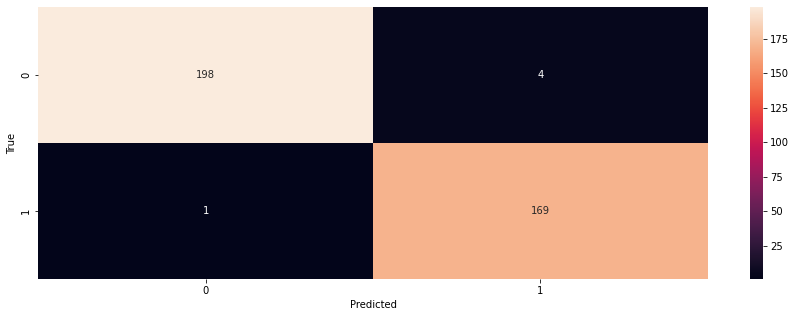

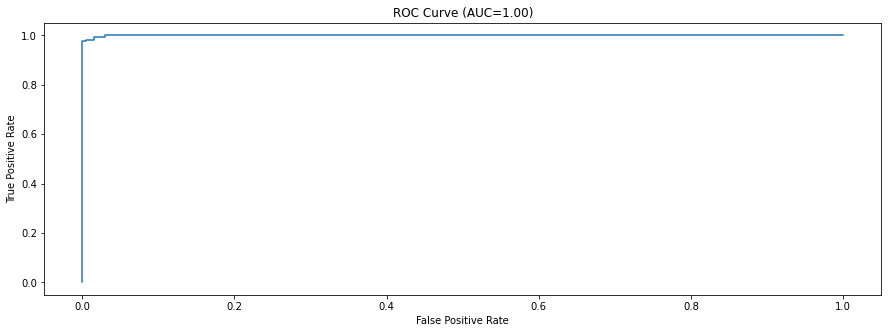

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Dividi il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2711, random_state=2)

# Istanzia un oggetto LogisticRegression
lr = LogisticRegression()

# Addestra il modello sui dati di training
lr.fit(X_train, y_train)

# Fai delle previsioni sui dati di test
y_pred = lr.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualizza la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calcola e visualizza la curva ROC
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc))
plt.show()


Regolarizzazione

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(penalty='l2')

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameter:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameter: {'C': 100}
Best score: 0.992


#### DECISION TREE

Anche nell'albero decisionale è possibile utilizzare la cross validation per trovare la profondità dell'albero ottimale e prevenire il sovradattamento.

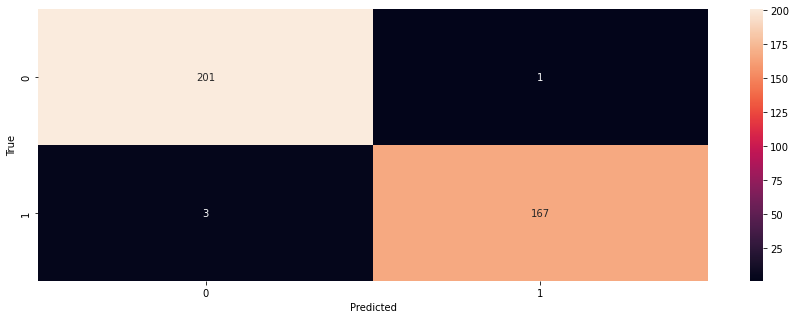

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       202
           1       0.99      0.98      0.99       170

    accuracy                           0.99       372
   macro avg       0.99      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Creazione dell'istanza del DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Fit del modello
dtc.fit(X_train, y_train)

# Predizione del test set
y_pred = dtc.predict(X_test)

# Valutazione delle performance
# Visualizza la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))


REgolarizzazione e cross validation

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

param_grid = {'max_depth': range(1, 11)}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameter:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameter: {'max_depth': 8}
Best score: 0.99


In [25]:
best_tree = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
best_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8)

[Text(0.4583333333333333, 0.9375, 'variance <= -0.04\ngini = 0.493\nsamples = 1000\nvalue = [560, 440]\nclass = Edible'),
 Text(0.2631578947368421, 0.8125, 'skewness <= 0.613\ngini = 0.306\nsamples = 467\nvalue = [88, 379]\nclass = Poisonous'),
 Text(0.14035087719298245, 0.6875, 'curtosis <= 1.119\ngini = 0.107\nsamples = 370\nvalue = [21, 349]\nclass = Poisonous'),
 Text(0.07017543859649122, 0.5625, 'curtosis <= 0.387\ngini = 0.015\nsamples = 260\nvalue = [2, 258]\nclass = Poisonous'),
 Text(0.03508771929824561, 0.4375, 'gini = 0.0\nsamples = 221\nvalue = [0, 221]\nclass = Poisonous'),
 Text(0.10526315789473684, 0.4375, 'skewness <= -0.433\ngini = 0.097\nsamples = 39\nvalue = [2, 37]\nclass = Poisonous'),
 Text(0.07017543859649122, 0.3125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]\nclass = Poisonous'),
 Text(0.14035087719298245, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Edible'),
 Text(0.21052631578947367, 0.5625, 'skewness <= -1.124\ngini = 0.286\nsamples = 110\nvalu

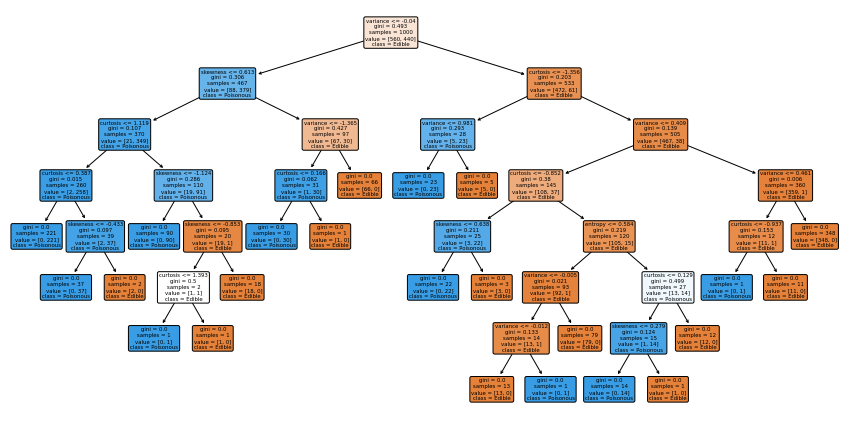

In [31]:
plt.figure(figsize=(15,7.5))
plot_tree(best_tree,
          filled=True,
          rounded=True,
          class_names=['Edible','Poisonous'],
          feature_names=colNames)

#### NAIVE BAYESIAN

Nel caso del Naive Bayes, non ci sono iper-parametri di regolarizzazione da impostare.

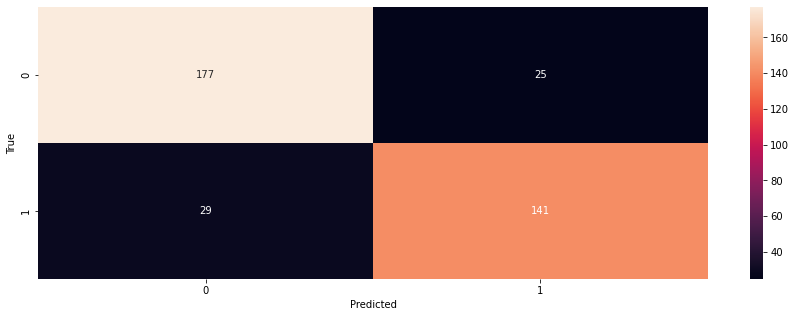

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       202
           1       0.85      0.83      0.84       170

    accuracy                           0.85       372
   macro avg       0.85      0.85      0.85       372
weighted avg       0.85      0.85      0.85       372



In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


# Creazione dell'istanza del GaussianNB
nb = GaussianNB()

# Fit del modello
nb.fit(X_train, y_train)

# Predizione del test set
y_pred = nb.predict(X_test)

# Visualizza la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))


#### K-NN

Per quanto riguarda K-NN, non c'è un parametro di regolarizzazione, ma è possibile utilizzare la cross validation per impostare il parametro n_neighbors che indica il numero di vicini più vicini da considerare nella predizione della classe di una nuova istanza.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Creazione dell'istanza del KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit del modello
knn.fit(X_train, y_train)

# Predizione del test set
y_pred = knn.predict(X_test)

# Valutazione delle performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[202   0]
 [  0 170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       170

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



Cross validation

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definire il modello con i parametri da testare
knn = KNeighborsClassifier()

# Definire la griglia di parametri da testare
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Eseguire la cross validation con la griglia di parametri definita
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Addestrare il modello con i dati di addestramento
grid_search.fit(X_train, y_train)

# Ottenere il valore migliore di n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Creare un nuovo classificatore K-NN con il valore migliore di n_neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Addestrare il modello sul dataset di addestramento completo
knn_best.fit(X_train, y_train)

# Valutare le performance del modello sul dataset di test
knn_best_score = knn_best.score(X_test, y_test)


In [33]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

# definire il modello KNN con n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# eseguire la cross validation con 5 fold
cv_results = cross_validate(knn_model, X, y, cv=5, scoring='accuracy')

# visualizzare i risultati della cross validation
print('Accuracy media: ', cv_results['test_score'].mean())
print('Deviazione standard: ', cv_results['test_score'].std())


Accuracy media:  0.9992700729927007
Deviazione standard:  0.0014598540145985604


PEr migliorare il modelli si potrebbe pensare di eseguire una trsformazione logaritmica delle variabili più assimmetriche Curtoris e entropy. DA FARE